In [118]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import datetime, nltk, warnings
import matplotlib.cm as cm
import itertools
from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn import preprocessing, model_selection, metrics, feature_selection
from sklearn.model_selection import GridSearchCV, learning_curve
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn import neighbors, linear_model, svm, tree, ensemble
from wordcloud import WordCloud, STOPWORDS
from sklearn.ensemble import AdaBoostClassifier
from sklearn.decomposition import PCA
from IPython.display import display, HTML

In [119]:
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
warnings.filterwarnings("ignore")
plt.rcParams["patch.force_edgecolor"] = True
plt.style.use('fivethirtyeight')
mpl.rc('patch', edgecolor = 'dimgray', linewidth=1)
%matplotlib inline

In [3]:
df_initial = pd.read_csv('data.csv',encoding='ISO-8859-1',dtype={'CumtomerID':str,'InvoiceNo':str})
df_initial.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [4]:
print('Dataframe dimensions:',df_initial.shape)

Dataframe dimensions: (541909, 8)


In [5]:
df_initial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null object
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [6]:
df_initial.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [7]:
df_initial['InvoiceDate'] =pd.to_datetime(df_initial['InvoiceDate'])

In [8]:
df_initial.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [9]:
df_initial.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [10]:
tab_info = pd.DataFrame(df_initial.dtypes).T.rename(index={0:'column type'})

In [11]:
tab_info = tab_info.append(pd.DataFrame(df_initial.isnull().sum()).T.rename(index={0:'null values(nb)'}))

In [12]:
tab_info = tab_info.append(pd.DataFrame(df_initial.isnull().sum()/df_initial.shape[0]*100).T.rename(index={0:'null values(%)'}))

In [13]:
display(tab_info)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
column type,object,object,object,int64,datetime64[ns],float64,float64,object
null values(nb),0,0,1454,0,0,0,135080,0
null values(%),0,0,0.268311,0,0,0,24.9267,0


In [14]:
display(df_initial[:5])

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [15]:
df_initial.dropna(axis = 0, subset=['CustomerID'],inplace=True)
print('Dataframe dimensions:',df_initial.shape)

tab_info = pd.DataFrame(df_initial.dtypes).T.rename(index ={0:'column type'})

Dataframe dimensions: (406829, 8)


In [16]:
tab_info =tab_info.append(pd.DataFrame(df_initial.isnull().sum()).T.rename(index ={0:'null values(nb)'}))
tab_info = tab_info.append(pd.DataFrame(df_initial.isnull().sum()/df_initial.shape[0]*100).T.rename(index={0:'null values(%)'}))
display(tab_info)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
column type,object,object,object,int64,datetime64[ns],float64,float64,object
null values(nb),0,0,0,0,0,0,0,0
null values(%),0,0,0,0,0,0,0,0


In [17]:
#删除重复内容
print('duplicates entries:{}'.format(df_initial.duplicated().sum()))
df_initial.drop_duplicates(inplace=True)

duplicates entries:5225


In [18]:
df_initial.shape

(401604, 8)

In [19]:
temp = df_initial[['CustomerID','InvoiceNo','Country']].groupby(['CustomerID','InvoiceNo','Country']).count()

In [20]:
temp = temp.reset_index(drop = False)

In [21]:
countries = temp['Country'].value_counts()

In [22]:
print('Nb . de pays dans le dataframe:{}'.format(len(countries)))

Nb . de pays dans le dataframe:37


In [23]:
import plotly
from plotly.graph_objs import Scatter, Layout
plotly.offline.init_notebook_mode(connected=True)

In [24]:
import plotly
print(plotly.__version__)
import plotly.plotly as py
import plotly.graph_objs as go
import plotly.figure_factory as ff

plotly.tools.set_credentials_file(username='changchunlai121', api_key='etHNL3bXg0OvIKyi2z4B')

data = dict(type = 'choropleth',
            locations = countries.index,
            locationmode = 'country names',z = countries,
            text = countries.index, colorbar = {'title':'Order nb.'},
            colorscale=[[0, 'rgb(224,255,255)'],
            [0.01, 'rgb(166,206,227)'], [0.02, 'rgb(31,120,180)'],
            [0.03, 'rgb(178,223,138)'], [0.05, 'rgb(51,160,44)'],
            [0.10, 'rgb(251,154,153)'], [0.20, 'rgb(255,255,0)'],
            [1, 'rgb(227,26,28)']],
            reversescale = False)

layout = dict(title='Number of order per country',
             geo = dict(showframe = True, projection = {'type':'Mercator'}))

choromap = go.Figure(data=[data],layout = layout)
py.iplot(choromap, validate=False)

2.7.0


In [25]:
pd.DataFrame([{'products':len(df_initial['StockCode'].value_counts()),
              'transactions':len(df_initial['InvoiceNo'].value_counts()),
              'customers':len(df_initial['CustomerID'].value_counts()),
              }],columns = ['products','transactions','customers'], index = ['quentity'])

,products,transactions,customers
quentity,3684,22190,4372


In [26]:
temp = df_initial.groupby(by=['CustomerID','InvoiceNo'],as_index= False)['InvoiceDate'].count()
nb_products_per_basket = temp.rename(columns={'InvoiceData':'Number of products'})
nb_products_per_basket[:10].sort_values('CustomerID')

,CustomerID,InvoiceNo,InvoiceDate
0,12346.0,541431,1
1,12346.0,C541433,1
2,12347.0,537626,31
3,12347.0,542237,29
4,12347.0,549222,24
5,12347.0,556201,18
6,12347.0,562032,22
7,12347.0,573511,47
8,12347.0,581180,11
9,12348.0,539318,17


In [27]:
nb_products_per_basket['order_canceled'] = nb_products_per_basket['InvoiceNo'].apply(lambda x:int('C' in x))
display(nb_products_per_basket[:5])

n1 = nb_products_per_basket['order_canceled'].sum()
n2 = nb_products_per_basket.shape[0]
print('Number of orders canceled:{}/{} ({:.2f}%)'.format(n1, n2, n1/n2*100))

,CustomerID,InvoiceNo,InvoiceDate,order_canceled
0,12346.0,541431,1,0
1,12346.0,C541433,1,1
2,12347.0,537626,31,0
3,12347.0,542237,29,0
4,12347.0,549222,24,0


Number of orders canceled:3654/22190 (16.47%)


In [28]:
display(df_initial.sort_values('CustomerID')[:5])

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom
61624,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2011-01-18 10:17:00,1.04,12346.0,United Kingdom
286623,562032,22375,AIRLINE BAG VINTAGE JET SET BROWN,4,2011-08-02 08:48:00,4.25,12347.0,Iceland
72260,542237,84991,60 TEATIME FAIRY CAKE CASES,24,2011-01-26 14:30:00,0.55,12347.0,Iceland
14943,537626,22772,PINK DRAWER KNOB ACRYLIC EDWARDIAN,12,2010-12-07 14:57:00,1.25,12347.0,Iceland


In [29]:
df_check =df_initial[df_initial['Quantity'] < 0][['CustomerID','Quantity','StockCode','Description','UnitPrice']]
for index, col in df_check.iterrows():
    if df_initial[(df_initial['CustomerID'] == col[0]) & (df_initial['Quantity'] == col[1])
                  & (df_initial['Description'] == col[2])].shape[0] ==0:
        print(df_check.loc[index])
        print(15*'-'+'>'+' HYPOTHESIS NOT FULFILLED')
        break

CustomerID        14527
Quantity             -1
StockCode             D
Description    Discount
UnitPrice          27.5
Name: 141, dtype: object
---------------> HYPOTHESIS NOT FULFILLED


In [30]:
df_check = df_initial[(df_initial['Quantity'] < 0) & (df_initial['Description'] != 'Discount')][
    ['CustomerID','Quantity','StockCode','Description','UnitPrice']]

In [31]:
for index, col in  df_check.iterrows():
    if df_initial[(df_initial['CustomerID'] == col[0]) & (df_initial['Quantity'] == -col[1]) 
                & (df_initial['Description'] == col[2])].shape[0] == 0: 
        print(index, df_check.loc[index])
        print(15*'-'+'>'+' HYPOTHESIS NOT FULFILLED')
        break

154 CustomerID                               15311
Quantity                                    -1
StockCode                               35004C
Description    SET OF 3 COLOURED  FLYING DUCKS
UnitPrice                                 4.65
Name: 154, dtype: object
---------------> HYPOTHESIS NOT FULFILLED


In [32]:
df_cleaned = df_initial.copy(deep = True)
df_cleaned['QuantityCanceled'] = 0

entry_to_remove = [] ; doubtfull_entry = []

for index, col in  df_initial.iterrows():
    if (col['Quantity'] > 0) or col['Description'] == 'Discount': continue        
    df_test = df_initial[(df_initial['CustomerID'] == col['CustomerID']) &
                         (df_initial['StockCode']  == col['StockCode']) & 
                         (df_initial['InvoiceDate'] < col['InvoiceDate']) & 
                         (df_initial['Quantity']   > 0)].copy()

    if (df_test.shape[0] == 0): 
        doubtfull_entry.append(index)

    elif (df_test.shape[0] == 1): 
        index_order = df_test.index[0]
        df_cleaned.loc[index_order, 'QuantityCanceled'] = -col['Quantity']
        entry_to_remove.append(index)        

    elif (df_test.shape[0] > 1): 
        df_test.sort_index(axis=0 ,ascending=False, inplace = True)        
        for ind, val in df_test.iterrows():
            if val['Quantity'] < -col['Quantity']: continue
            df_cleaned.loc[ind, 'QuantityCanceled'] = -col['Quantity']
            entry_to_remove.append(index) 
            break  

In [33]:
print("entry_to_remove: {}".format(len(entry_to_remove)))
print("doubtfull_entry: {}".format(len(doubtfull_entry)))

entry_to_remove: 7521
doubtfull_entry: 1226


In [34]:
df_cleaned.drop(entry_to_remove, axis = 0, inplace=True)
df_cleaned.drop(doubtfull_entry, axis = 0, inplace=True)

In [35]:
remaining_entries = df_cleaned[(df_cleaned['Quantity'] < 0)&
                              (df_cleaned['StockCode'] != 'D')]
print('nb of entries to delete:{}'.format(remaining_entries.shape[0]))
remaining_entries[:5]

nb of entries to delete:48


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,QuantityCanceled
77598,C542742,84535B,FAIRY CAKES NOTEBOOK A6 SIZE,-94,2011-01-31 16:26:00,0.65,15358.0,United Kingdom,0
90444,C544038,22784,LANTERN CREAM GAZEBO,-4,2011-02-15 11:32:00,4.95,14659.0,United Kingdom,0
111968,C545852,22464,HANGING METAL HEART LANTERN,-5,2011-03-07 13:49:00,1.65,14048.0,United Kingdom,0
116064,C546191,47566B,TEA TIME PARTY BUNTING,-35,2011-03-10 10:57:00,0.70,16422.0,United Kingdom,0
132642,C547675,22263,FELT EGG COSY LADYBIRD,-49,2011-03-24 14:07:00,0.66,17754.0,United Kingdom,0


In [36]:
df_cleaned[(df_cleaned['CustomerID'] == 14080)&
          (df_cleaned['StockCode'] == '22464')]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,QuantityCanceled


In [37]:
list_special_code = df_cleaned[df_cleaned['StockCode'].str.contains('^[a-zA-Z]+', regex=True)]['StockCode'].unique()
list_special_code

array(['POST', 'D', 'C2', 'M', 'BANK CHARGES', 'PADS', 'DOT'],
      dtype=object)

In [38]:
for code in list_special_code:
    print('{:<15} -> {: <30}'.format(code, df_cleaned[df_cleaned['StockCode'] == code]['Description'].unique()[0]))

POST            -> POSTAGE                       
D               -> Discount                      
C2              -> CARRIAGE                      
M               -> Manual                        
BANK CHARGES    -> Bank Charges                  
PADS            -> PADS TO MATCH ALL CUSHIONS    
DOT             -> DOTCOM POSTAGE                


In [39]:
df_cleaned['TotalPrice'] = df_cleaned['UnitPrice']*(df_cleaned['Quantity'] - df_cleaned['QuantityCanceled'])
df_cleaned.sort_values('CustomerID')[:5]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,QuantityCanceled,TotalPrice
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom,74215,0.0
148288,549222,22375,AIRLINE BAG VINTAGE JET SET BROWN,4,2011-04-07 10:43:00,4.25,12347.0,Iceland,0,17.0
428971,573511,22698,PINK REGENCY TEACUP AND SAUCER,12,2011-10-31 12:25:00,2.95,12347.0,Iceland,0,35.4
428970,573511,47559B,TEA TIME OVEN GLOVE,10,2011-10-31 12:25:00,1.25,12347.0,Iceland,0,12.5
428969,573511,47567B,TEA TIME KITCHEN APRON,6,2011-10-31 12:25:00,5.95,12347.0,Iceland,0,35.7


In [40]:
temp = df_cleaned.groupby(by=['CustomerID','InvoiceNo'],as_index =False)['TotalPrice'].sum()
basket_price = temp.rename(columns={'TotalPrice':'Basket Price'})

df_cleaned['InvoiceDate_int'] = df_cleaned['InvoiceDate'].astype('int64')
temp = df_cleaned.groupby(by =['CustomerID','InvoiceNo'],as_index = False)['InvoiceDate_int'].mean()
df_cleaned.drop('InvoiceDate_int',axis = 1,inplace=True)
basket_price.loc[:,'InvoiceData'] = pd.to_datetime(temp['InvoiceDate_int'])

basket_price = basket_price[basket_price['Basket Price'] > 0]
basket_price.sort_values('CustomerID')[:6]

,CustomerID,InvoiceNo,Basket Price,InvoiceData
1,12347.0,537626,711.79,2010-12-07 14:57:00.000001024
2,12347.0,542237,475.39,2011-01-26 14:29:59.999999744
3,12347.0,549222,636.25,2011-04-07 10:42:59.999999232
4,12347.0,556201,382.52,2011-06-09 13:01:00.000000256
5,12347.0,562032,584.91,2011-08-02 08:48:00.000000000
6,12347.0,573511,1294.32,2011-10-31 12:25:00.000001280


Text(0.5,1,'basket price ')

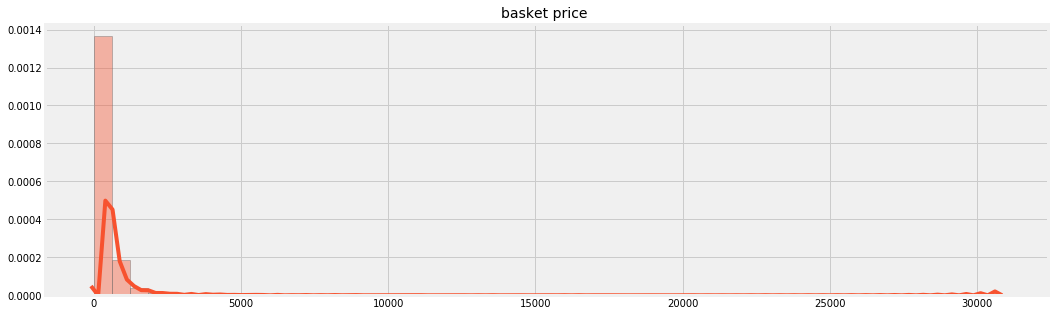

In [41]:
import seaborn as sns
fig, ax = plt.subplots(1, figsize=(16,5))
Basket_Price = basket_price["Basket Price"].values
sns.distplot(Basket_Price, ax=ax, color="#F7522F")
ax.set_title("basket price ", fontsize=14)      #画分布图

Text(0.5,1,'basket price < 5000')

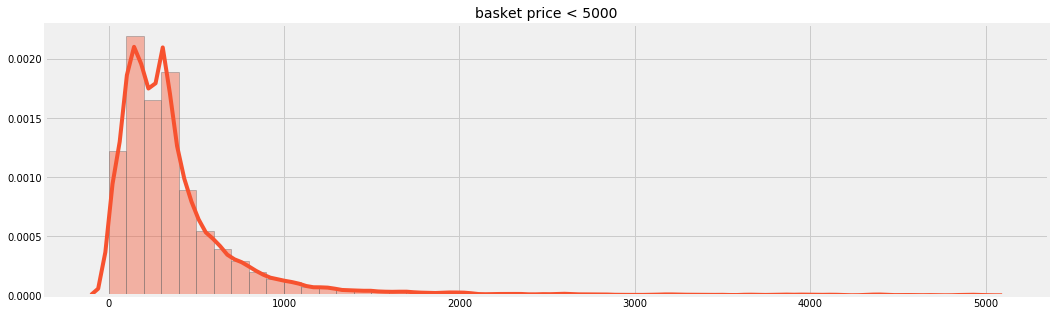

In [42]:
index0 = basket_price[basket_price["Basket Price"] < 5000].index.tolist()
Basket_Price2 = basket_price.loc[index0,:]
fig, ax = plt.subplots(1, figsize=(16,5))
Basket_Price = Basket_Price2["Basket Price"].values
sns.distplot(Basket_Price, ax=ax, color="#F7522F")
ax.set_title("basket price < 5000", fontsize=14)

30757.0
0.38


Text(0.5,1.01,'Representation des mintants des commendes')

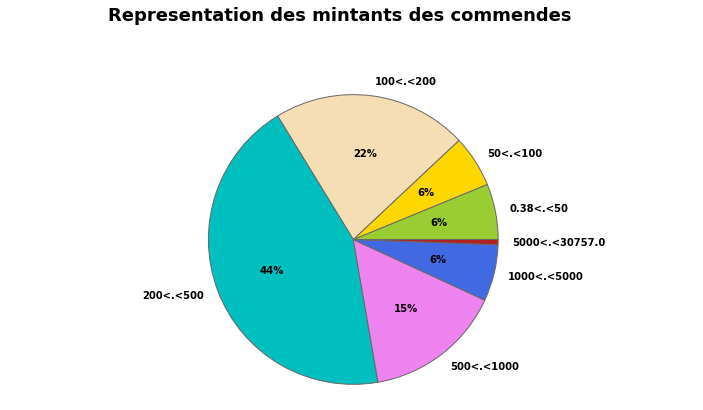

In [43]:

print(max(basket_price['Basket Price']))
print(min(basket_price['Basket Price']))
price_range =[0.38,50,100,200,500,1000,5000,30757.0]
count_price = []
for i, price  in enumerate(price_range):
    if i == 0:
        continue
    val = basket_price[(basket_price['Basket Price'] < price)&
                      (basket_price['Basket Price'] > price_range[i-1])]['Basket Price'].count()
    count_price.append(val)

plt.rc('font',weight = 'bold')
f,ax = plt.subplots(figsize =(11,6))
colors = ['yellowgreen', 'gold', 'wheat', 'c', 'violet', 'royalblue','firebrick']
labels = ['{}<.<{}'.format(price_range[i-1], s) for i,s in enumerate(price_range) if i != 0]
sizes = count_price
explode = [0.0 if sizes[i] < 100 else 0.0 for i in range(len(sizes))]
ax.pie(sizes, explode = explode, labels = labels, colors = colors,
      autopct = lambda x: '{:1.0f}%'.format(x) if x > 1 else'',shadow = False, startangle = 0)
ax.axis('equal')
f.text(0.5, 1.01, 'Representation des mintants des commendes', ha = 'center', fontsize = 18)

##66%的purchase超过200

## 探析产品类别

In [44]:
is_noun = lambda pos: pos[:2] == 'NN'

def keywords_inventory(dataframe, colonne = 'Description'):
    stemmer = nltk.stem.SnowballStemmer("english")
    keywords_roots  = dict() 
    keywords_select = dict() 
    category_keys   = []
    count_keywords  = dict()
    icount = 0
    for s in dataframe[colonne]:
        if pd.isnull(s): continue
        lines = s.lower()
        tokenized = nltk.word_tokenize(lines)
        nouns = [word for (word, pos) in nltk.pos_tag(tokenized) if is_noun(pos)] 
        
        for t in nouns:
            t = t.lower() ; racine = stemmer.stem(t)
            if racine in keywords_roots:                
                keywords_roots[racine].add(t)
                count_keywords[racine] += 1                
            else:
                keywords_roots[racine] = {t}
                count_keywords[racine] = 1
    
    for s in keywords_roots.keys():
        if len(keywords_roots[s]) > 1:  
            min_length = 1000
            for k in keywords_roots[s]:
                if len(k) < min_length:
                    clef = k ; min_length = len(k)            
            category_keys.append(clef)
            keywords_select[s] = clef
        else:
            category_keys.append(list(keywords_roots[s])[0])
            keywords_select[s] = list(keywords_roots[s])[0]
                   
    print("Nb of keywords in variable '{}': {}".format(colonne,len(category_keys)))
    return category_keys, keywords_roots, keywords_select, count_keywords

In [45]:
df_products = pd.DataFrame(df_initial['Description'].unique()).rename(columns = {0:'Description'})

In [46]:
keywords, keywords_roots, keywords_select, count_keywords = keywords_inventory(df_products)

Nb of keywords in variable 'Description': 1483


In [47]:
list_products = []
for k,v in count_keywords.items():
    list_products.append([keywords_select[k],v])
list_products.sort(key = lambda x:x[1], reverse = True)

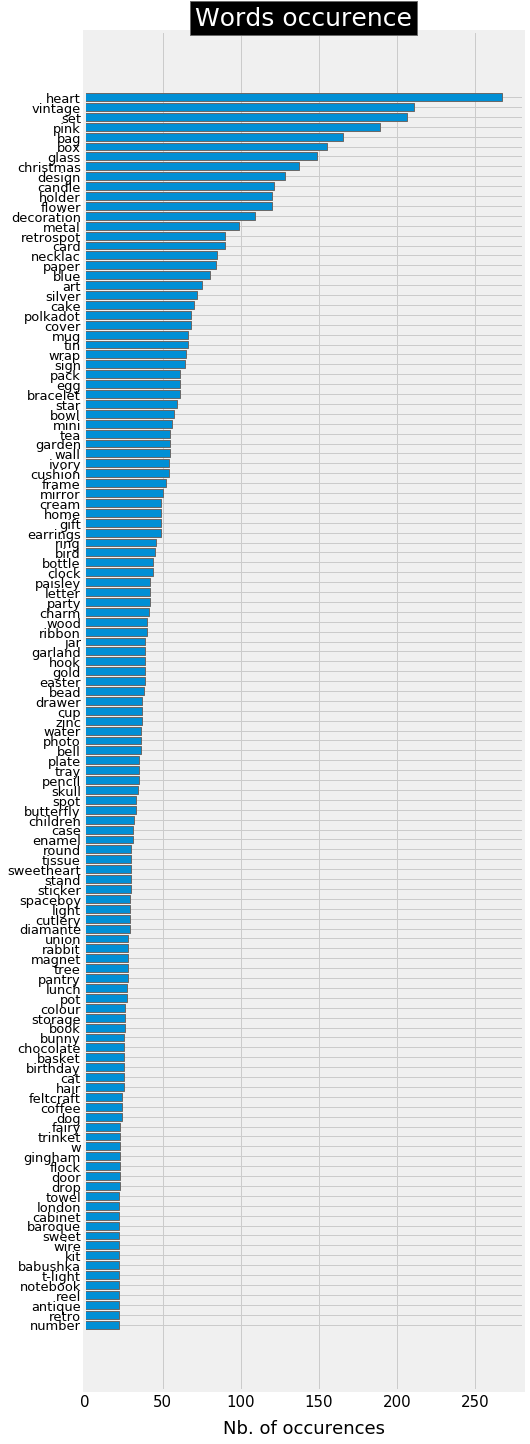

all conserves: 1483


In [48]:
liste = sorted(list_products,key = lambda x:x[1], reverse=True)

plt.rc('font',weight = 'normal')
fig, ax = plt.subplots(figsize = (7,25))
y_axis = [i[1] for i  in liste[:125]]
x_axis = [k for k,i in enumerate(liste[:125])]
x_label = [i[0] for i in liste[:125]]
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 13)
plt.yticks(x_axis, x_label)
plt.xlabel('Nb. of occurences', fontsize =18, labelpad = 10)
ax.barh(x_axis,y_axis,align = 'center')
ax = plt.gca()
ax.invert_yaxis()
#------------------------------------------
plt.title("Words occurence",bbox={'facecolor':'k', 'pad':5}, color='w',fontsize = 25)
plt.show()
print('all conserves:', len(list_products))

In [49]:
list_products = []
for k, v in count_keywords.items():
    word = keywords_select[k]
    if word in ['pink', 'blue', 'tag', 'green', 'orange']:
        continue
    if len(word) < 3 or v < 13:
        continue
    if('+' in word) or ('/' in word):
        continue
    list_products.append([word,v])
    
list_products.sort(key =lambda x:x[1], reverse=True)
print('most conserves:',len(list_products))

most conserves: 193


In [50]:
liste_produits = df_cleaned['Description'].unique()
X = pd.DataFrame()
for key, occurence in list_products:
    X.loc[:, key] = list(map(lambda x:int(key.upper() in x), liste_produits))

In [51]:
X.loc[:,'heart'][:5]

0    1
1    0
2    1
3    0
4    1
Name: heart, dtype: int64

In [52]:
liste_produits

array(['WHITE HANGING HEART T-LIGHT HOLDER', 'WHITE METAL LANTERN',
       'CREAM CUPID HEARTS COAT HANGER', ...,
       'PINK CRYSTAL SKULL PHONE CHARM',
       'CREAM HANGING HEART T-LIGHT HOLDER',
       'PAPER CRAFT , LITTLE BIRDIE'], dtype=object)

In [53]:
list(map(lambda x:int(key.upper() in x), list_products))[:5]

[0, 0, 0, 0, 0]

In [54]:
threshold = [0, 1, 2, 3, 5, 10]
label_col = []
for i in range(len(threshold)):
    if i == len(threshold)-1:
        col = '.>{}'.format(threshold[i])
    else:
        col = '{}<.<{}'.format(threshold[i],threshold[i+1])
    label_col.append(col)
    X.loc[:, col] = 0

for i, prod in enumerate(liste_produits):
    prix = df_cleaned[ df_cleaned['Description'] == prod]['UnitPrice'].mean()
    j = 0
    while prix > threshold[j]:
        j+=1
        if j == len(threshold): break
    X.loc[i, label_col[j-1]] = 1

In [55]:
print("{:<8} {:<20} \n".format('gamme', 'nb. produits') + 20*'-')
for i in range(len(threshold)):
    if i == len(threshold)-1:
        col = '.>{}'.format(threshold[i])
    else:
        col = '{}<.<{}'.format(threshold[i],threshold[i+1])    
    print("{:<10}  {:<20}".format(col, X.loc[:, col].sum()))

gamme    nb. produits         
--------------------
0<.<1       964                 
1<.<2       1009                
2<.<3       673                 
3<.<5       606                 
5<.<10      470                 
.>10        156                 


In [56]:
print("{:<8} {:<20} \n".format('gamme', 'nb. produits') + 20*'-')
for i in range(len(threshold)):
    if i == len(threshold)-1:
        col = '.>{}'.format(threshold[i])
    else:
        col = '{}<.<{}'.format(threshold[i],threshold[i+1])    
    print("{:<10}  {:<20}".format(col, X.loc[:, col].sum()))

gamme    nb. produits         
--------------------
0<.<1       964                 
1<.<2       1009                
2<.<3       673                 
3<.<5       606                 
5<.<10      470                 
.>10        156                 


In [63]:
#词云
#看每个簇表示的对象的类型。为了获取对其内容的全局视图，先确定那个关键词的出现频数最多

liste = pd.DataFrame(liste_produits)
liste_words = [word for (word, occurence) in list_products]

occurence = [dict() for _ in range(n_clusters)]

for i in range(n_clusters):
    liste_cluster = liste.loc[clusters == i]
    for word in liste_words:
        occurence[i][word] = sum(liste_cluster.loc[:,0].str.contains(word.upper()))

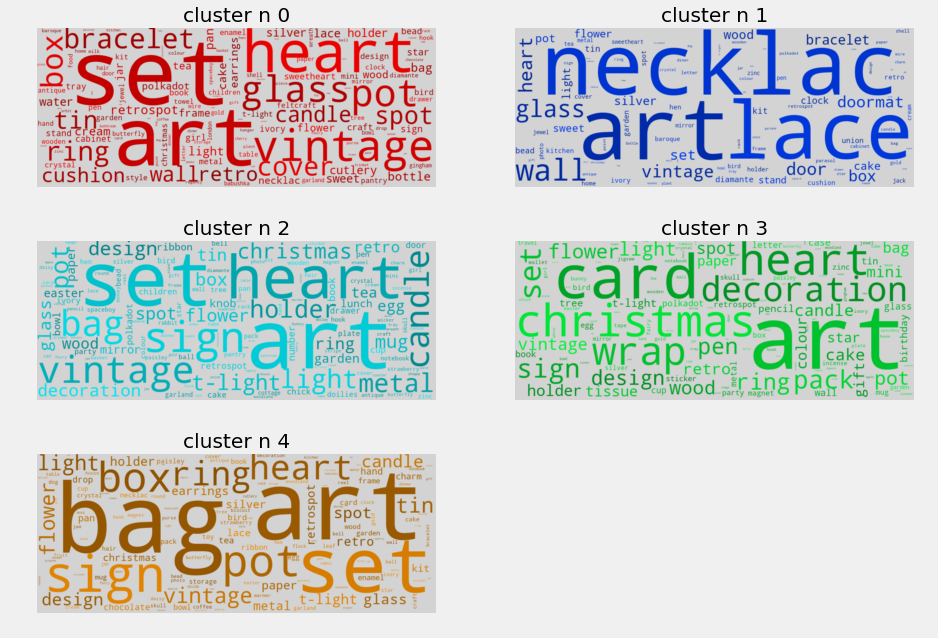

In [64]:

def random_color_func(word = None,font_size = None,position = None,
                     orientation = None, font_path = None, random_state = None):
    h = int(360.0 * tone / 255.0)
    s = int(100.0 * 255.0 / 255.0)
    l = int(100.0 * float(random_state.randint(70, 120)) / 255.0)
    return 'hsl({},{}%, {}%)'.format(h,s,l)

def make_wordcloud(liste,increment):
    ax1 = fig.add_subplot(4,2,increment)
    words = dict()
    trunc_occurences = liste[0:150]
    for s in trunc_occurences:
        words[s[0]] = s[1]
 
    wordcloud = WordCloud(width=1000,height=400, background_color='lightgrey', 
                          max_words=1628,relative_scaling=1,
                          color_func = random_color_func,
                          normalize_plurals=False)
    wordcloud.generate_from_frequencies(words)
    ax1.imshow(wordcloud, interpolation="bilinear")
    ax1.axis('off')
    plt.title('cluster n {}'.format(increment-1))

fig = plt.figure(1, figsize=(14,14))
color = [0, 160, 130, 95, 280, 40, 330, 110, 25]
for i in range(n_clusters):
    list_cluster_occurences = occurence[i]

    tone = color[i] 
    liste = []
    for key, value in list_cluster_occurences.items():
        liste.append([key, value])
    liste.sort(key = lambda x:x[1], reverse = True)
    make_wordcloud(liste, i+1)    

In [65]:
pca = PCA()
pca.fit(matrix)
pca_samples = pca.transform(matrix)

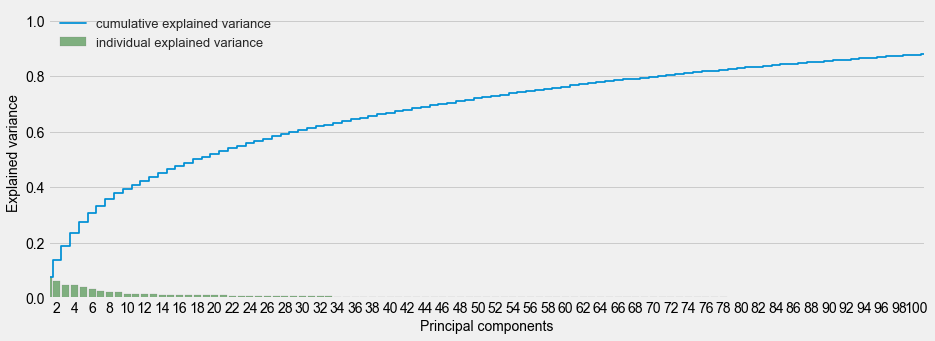

In [66]:
fig, ax = plt.subplots(figsize=(14, 5))
sns.set(font_scale=1)
plt.step(range(matrix.shape[1]), pca.explained_variance_ratio_.cumsum(), where='mid',
         label='cumulative explained variance')
sns.barplot(np.arange(1,matrix.shape[1]+1), pca.explained_variance_ratio_, alpha=0.5, color = 'g',
            label='individual explained variance')
plt.xlim(0, 100)

ax.set_xticklabels([s if int(s.get_text())%2 == 0 else '' for s in ax.get_xticklabels()])

plt.ylabel('Explained variance', fontsize = 14)
plt.xlabel('Principal components', fontsize = 14)
plt.legend(loc='upper left', fontsize = 13)

In [67]:
pca = PCA(n_components=50)
matrix_9D = pca.fit_transform(matrix)
mat = pd.DataFrame(matrix_9D)
mat['cluster'] = pd.Series(clusters)
print( pca.explained_variance_ratio_)
print( pca.explained_variance_)

[0.07539347 0.06167517 0.04955308 0.04732509 0.0404648  0.03303258
 0.02544092 0.02329754 0.02151875 0.01710604 0.0149248  0.01429949
 0.01382595 0.01342583 0.01282759 0.01228206 0.01199352 0.0114382
 0.01054239 0.01023831 0.0101775  0.00977978 0.00914781 0.00844532
 0.00838859 0.00819588 0.00794167 0.00759766 0.0074045  0.00718067
 0.00701791 0.00682111 0.00663037 0.00641527 0.00621965 0.00612972
 0.00598259 0.00587907 0.00575693 0.00566734 0.00552308 0.00540654
 0.00538308 0.0053032  0.00513898 0.00501674 0.00493927 0.00480304
 0.00470015 0.00463026]
[0.25909713 0.21195285 0.17029406 0.16263737 0.13906129 0.11351975
 0.08743023 0.08006432 0.07395133 0.05878661 0.05129054 0.04914162
 0.04751424 0.0461392  0.04408328 0.04220852 0.04121691 0.03930851
 0.03622995 0.03518498 0.03497597 0.0336092  0.03143736 0.02902319
 0.02882824 0.02816595 0.02729233 0.02611012 0.02544628 0.02467707
 0.02411774 0.02344141 0.02278592 0.02204673 0.02137443 0.02106538
 0.02055975 0.02020401 0.01978426 0.019

In [68]:
print((pca.explained_variance_ratio_).sum())
print(( pca.explained_variance_).sum())

0.7182292520228496
2.4682660446575437


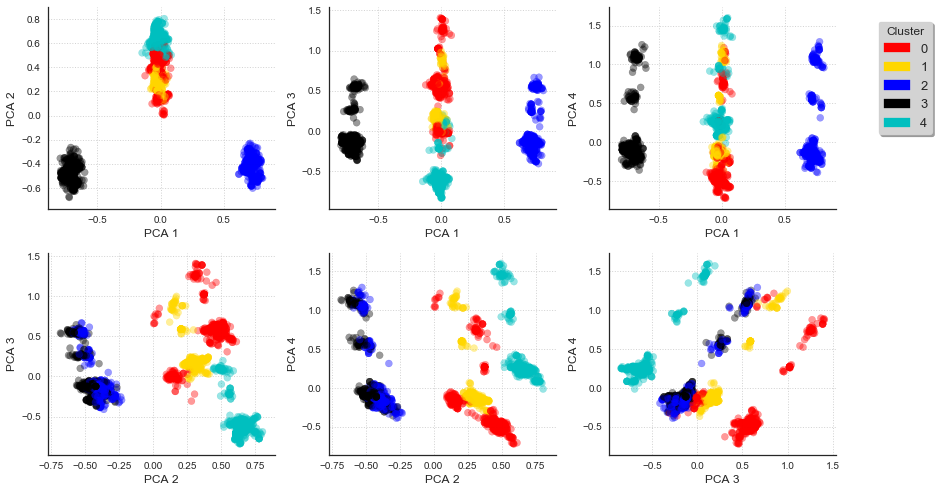

In [69]:
import matplotlib.patches as mpatches

sns.set_style("white")
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 2.5})

LABEL_COLOR_MAP = {0:'r', 1:'gold', 2:'b', 3:'k', 4:'c', 5:'g'}
label_color = [LABEL_COLOR_MAP[l] for l in mat['cluster']]

fig = plt.figure(figsize = (12,10))
increment = 0
for ix in range(4):
    for iy in range(ix+1, 4):    
        increment += 1
        ax = fig.add_subplot(3,3,increment)
        ax.scatter(mat[ix], mat[iy], c= label_color, alpha=0.4) 
        plt.ylabel('PCA {}'.format(iy+1), fontsize = 12)
        plt.xlabel('PCA {}'.format(ix+1), fontsize = 12)
        ax.yaxis.grid(color='lightgray', linestyle=':')
        ax.xaxis.grid(color='lightgray', linestyle=':')
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        
        if increment == 9: break
    if increment == 9: break
        
comp_handler = []
for i in range(5):
    comp_handler.append(mpatches.Patch(color = LABEL_COLOR_MAP[i], label = i))

plt.legend(handles=comp_handler, bbox_to_anchor=(1.1, 0.97), 
           title='Cluster', facecolor = 'lightgrey',
           shadow = True, frameon = True, framealpha = 1,
           fontsize = 13, bbox_transform = plt.gcf().transFigure)

plt.tight_layout()

## 4 客户分类

In [70]:
corresp = dict()
for key, val in zip(liste_produits, clusters):
    corresp[key] = val

df_cleaned['categ_product'] = df_cleaned.loc[:,'Description'].map(corresp)

In [71]:
for i in range(5):
    col = 'categ_{}'.format(i)        
    df_temp = df_cleaned[df_cleaned['categ_product'] == i]
    price_temp = df_temp['UnitPrice'] * (df_temp['Quantity'] - df_temp['QuantityCanceled'])
    price_temp = price_temp.apply(lambda x:x if x > 0 else 0)
    df_cleaned.loc[:, col] = price_temp
    df_cleaned[col].fillna(0, inplace = True)
#__________________________________________________________________________________________________
df_cleaned[['InvoiceNo', 'Description', 'categ_product', 'categ_0', 'categ_1', 'categ_2', 'categ_3','categ_4']][:5]

,InvoiceNo,Description,categ_product,categ_0,categ_1,categ_2,categ_3,categ_4
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,4,0.00,0.0,0.0,0.0,15.3
1,536365,WHITE METAL LANTERN,0,20.34,0.0,0.0,0.0,0.0
2,536365,CREAM CUPID HEARTS COAT HANGER,0,22.00,0.0,0.0,0.0,0.0
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,0,20.34,0.0,0.0,0.0,0.0
4,536365,RED WOOLLY HOTTIE WHITE HEART.,0,20.34,0.0,0.0,0.0,0.0


In [72]:

temp = df_cleaned.groupby(by = ['CustomerID','InvoiceNo'],as_index=False)['TotalPrice'].sum()
basket_price = temp.rename(columns= {'TotalPrice':'Basket Price'})

for i in range(5):
    col = 'categ_{}'.format(i)
    temp = df_cleaned.groupby(by = ['CustomerID','InvoiceNo'], as_index=False)[col].sum()
    basket_price.loc[:, col] = temp

df_cleaned['InvoiceDate_int'] = df_cleaned['InvoiceDate'].astype('int64')
temp = df_cleaned.groupby(by=['CustomerID','InvoiceNo'],as_index=False)['InvoiceDate_int'].mean()
df_cleaned.drop('InvoiceDate_int', axis = 1, inplace=True)
basket_price.loc[:, 'InvoiceDate'] = pd.to_datetime(temp['InvoiceDate_int'])

basket_price = basket_price[basket_price['Basket Price'] > 0]
basket_price.sort_values('CustomerID',ascending = True)[:5]

,CustomerID,InvoiceNo,Basket Price,categ_0,categ_1,categ_2,categ_3,categ_4,InvoiceDate
1,12347.0,537626,711.79,293.35,124.44,187.2,23.40,83.40,2010-12-07 14:57:00.000001024
2,12347.0,542237,475.39,207.45,0.00,130.5,84.34,53.10,2011-01-26 14:29:59.999999744
3,12347.0,549222,636.25,153.25,0.00,330.9,81.00,71.10,2011-04-07 10:42:59.999999232
4,12347.0,556201,382.52,168.76,19.90,74.4,41.40,78.06,2011-06-09 13:01:00.000000256
5,12347.0,562032,584.91,196.41,97.80,109.7,61.30,119.70,2011-08-02 08:48:00.000000000


In [73]:
type(basket_price['InvoiceDate'])

pandas.core.series.Series

In [74]:
print(basket_price['InvoiceDate'].min(), '->', basket_price['InvoiceDate'].max())

2010-12-01 08:26:00 -> 2011-12-09 12:50:00


In [75]:
set_entrainement = basket_price[basket_price['InvoiceDate'] < datetime.date(2011,10,1)]
set_test = basket_price[basket_price['InvoiceDate'] >= datetime.date(2011,10,1)]
basket_price = set_entrainement.copy(deep = True)

In [76]:
transactions_per_user = basket_price.groupby(by=['CustomerID'])['Basket Price'].agg(['count','min','max','mean','sum'])
for i in range(5):
    col = 'categ_{}'.format(i)
    transactions_per_user.loc[:,col] = basket_price.groupby(by = ['CustomerID'])[col].sum()/transactions_per_user['sum']*100
    
transactions_per_user.reset_index(drop = False, inplace = True)
basket_price.groupby(by=['CustomerID'])['categ_0'].sum()
transactions_per_user.sort_values('CustomerID',ascending = True)[:5]

,CustomerID,count,min,max,mean,sum,categ_0,categ_1,categ_2,categ_3,categ_4
0,12347.0,5,382.52,711.79,558.172000,2790.86,36.519926,8.676179,29.836681,10.442659,14.524555
1,12348.0,4,227.44,892.80,449.310000,1797.24,20.030714,0.000000,41.953217,38.016069,0.000000
2,12350.0,1,334.40,334.40,334.400000,334.40,11.961722,0.000000,48.444976,11.692584,27.900718
3,12352.0,6,144.35,840.30,345.663333,2073.98,68.944734,14.301006,12.892120,0.491808,3.370331
4,12353.0,1,89.00,89.00,89.000000,89.00,44.719101,22.359551,13.033708,0.000000,19.887640


#### 最后，我定义了两个额外的变量，这些变量提供了自第一次购买（第一次购买）以来的天数，以及上次购买（last购买）以来的天数：

In [77]:
last_date = basket_price['InvoiceDate'].max().date()

first_registration = pd.DataFrame(basket_price.groupby(by=['CustomerID'])['InvoiceDate'].min())
last_purchase  = pd.DataFrame(basket_price.groupby(by=['CustomerID'])['InvoiceDate'].max())

test = first_registration.applymap(lambda x:(last_date - x.date()).days)
test2 = last_purchase.applymap(lambda x:(last_date - x.date()).days)

transactions_per_user.loc[:,'LastPurchase'] = test2.reset_index(drop = False)['InvoiceDate']
transactions_per_user.loc[:,'FirstPurchase'] = test.reset_index(drop = False)['InvoiceDate']

transactions_per_user[:5]

,CustomerID,count,min,max,mean,sum,categ_0,categ_1,categ_2,categ_3,categ_4,LastPurchase,FirstPurchase
0,12347.0,5,382.52,711.79,558.172000,2790.86,36.519926,8.676179,29.836681,10.442659,14.524555,59,297
1,12348.0,4,227.44,892.80,449.310000,1797.24,20.030714,0.000000,41.953217,38.016069,0.000000,5,288
2,12350.0,1,334.40,334.40,334.400000,334.40,11.961722,0.000000,48.444976,11.692584,27.900718,240,240
3,12352.0,6,144.35,840.30,345.663333,2073.98,68.944734,14.301006,12.892120,0.491808,3.370331,2,226
4,12353.0,1,89.00,89.00,89.000000,89.00,44.719101,22.359551,13.033708,0.000000,19.887640,134,134


In [78]:
n1 = transactions_per_user[transactions_per_user['count'] == 1].shape[0]
n2 = transactions_per_user.shape[0]
print('nb. de client avec achat unique : {:<2}/{:<5} ({:<2.2f}%)'.format(n1,n2,n1/n2*100))

nb. de client avec achat unique : 1445/3608  (40.05%)


In [79]:
print('nb. de client avec achat unique : {:>2}/{:>2} ({:.2f}%)'.format(n1,n2,n1/n2*100))

nb. de client avec achat unique : 1445/3608 (40.05%)


In [80]:
print('nb. de client avec achat unique : {:<5}/{} ({:.2f}%)'.format(n1,n2,n1/n2*100))

nb. de client avec achat unique : 1445 /3608 (40.05%)


## 4.2 创建客户类别
4.2.1数据编码准备
dataframe transactionsperuser包含了所有发出的命令的摘要。
这个dataframe中的每个条目对应一个特定的客户端。我使用这些信息来描述不同类型的客户，并且只保留一个变量的子集：

In [81]:
list_cols = ['count','min','max','mean','categ_0','categ_1','categ_2','categ_3','categ_4']

selected_customers = transactions_per_user.copy(deep =True )
matrix = selected_customers[list_cols].as_matrix()

#由于选择变量量纲不相同，接下来的工作是进行标准化

In [82]:
scaler = StandardScaler()
scaler.fit(matrix)
print('Variable mean values: \n' + 90*'-' + '\n' ,scaler.mean_)    #输出变量的均值
scaler_matrix = scaler.transform(matrix)

Variable mean values: 
------------------------------------------------------------------------------------------
 [  3.62305987 259.93189634 556.26687999 377.06036244  23.91238925
  15.67936332  25.22916919  13.98907929  21.19884856]


In [83]:
pca = PCA()
pca.fit(scaler_matrix)
pec_samples = scaler.transform(scaler_matrix)

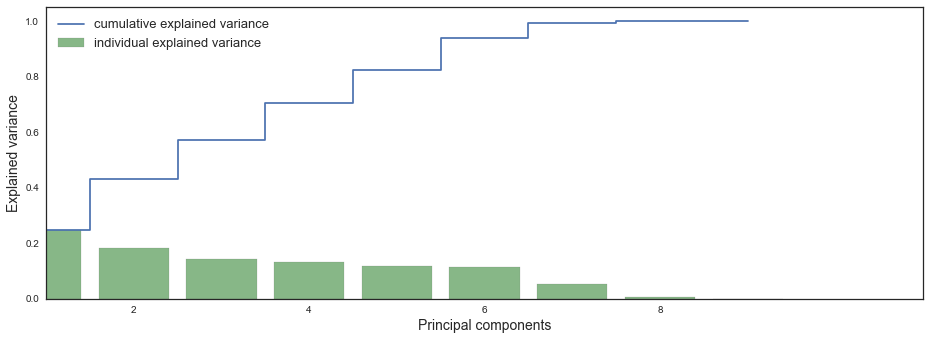

In [84]:

fig,ax = plt.subplots(figsize = (14,5))
sns.set(font_scale =1)
plt.step(range(matrix.shape[1]),pca.explained_variance_ratio_.cumsum(),where = 'mid',
        label = 'cumulative explained variance')
sns.barplot(np.arange(1,matrix.shape[1]+1),pca.explained_variance_ratio_, alpha = 0.5, color = 'g',label ='individual explained variance')
plt.xlim(0, 10)

ax.set_xticklabels([s if int(s.get_text())%2 == 0 else ' ' for s in ax.get_xticklabels()])

plt.ylabel('Explained variance', fontsize = 14)
plt.xlabel('Principal components', fontsize = 14)
plt.legend(loc='best', fontsize = 13)

In [85]:
print(pca.explained_variance_ratio_)

[2.47898231e-01 1.82768486e-01 1.42797439e-01 1.31798163e-01
 1.19488103e-01 1.14522315e-01 5.43394644e-02 6.38539758e-03
 2.40129286e-06]


In [86]:
aa = pd.DataFrame(scaler_matrix)
aa[:5]

,0,1,2,3,4,5,6,7,8
0,0.226822,0.377306,0.139541,0.396028,0.681715,-0.424780,0.263401,-0.228401,-0.392514
1,0.062093,-0.100005,0.301949,0.157985,-0.209890,-0.951036,0.956076,1.547416,-1.246699
2,-0.432095,0.229201,-0.199066,-0.093283,-0.646197,-0.951036,1.327195,-0.147902,0.394135
3,0.391551,-0.355742,0.254844,-0.068654,2.434989,-0.083605,-0.705281,-0.869268,-1.048491
4,-0.432095,-0.526101,-0.419248,-0.629888,1.125061,0.405188,-0.697187,-0.900942,-0.077112


In [87]:
pd.DataFrame(matrix)[:5]

,0,1,2,3,4,5,6,7,8
0,5.0,382.52,711.79,558.172000,36.519926,8.676179,29.836681,10.442659,14.524555
1,4.0,227.44,892.80,449.310000,20.030714,0.000000,41.953217,38.016069,0.000000
2,1.0,334.40,334.40,334.400000,11.961722,0.000000,48.444976,11.692584,27.900718
3,6.0,144.35,840.30,345.663333,68.944734,14.301006,12.892120,0.491808,3.370331
4,1.0,89.00,89.00,89.000000,44.719101,22.359551,13.033708,0.000000,19.887640


In [88]:
selected_customers[:5]

,CustomerID,count,min,max,mean,sum,categ_0,categ_1,categ_2,categ_3,categ_4,LastPurchase,FirstPurchase
0,12347.0,5,382.52,711.79,558.172000,2790.86,36.519926,8.676179,29.836681,10.442659,14.524555,59,297
1,12348.0,4,227.44,892.80,449.310000,1797.24,20.030714,0.000000,41.953217,38.016069,0.000000,5,288
2,12350.0,1,334.40,334.40,334.400000,334.40,11.961722,0.000000,48.444976,11.692584,27.900718,240,240
3,12352.0,6,144.35,840.30,345.663333,2073.98,68.944734,14.301006,12.892120,0.491808,3.370331,2,226
4,12353.0,1,89.00,89.00,89.000000,89.00,44.719101,22.359551,13.033708,0.000000,19.887640,134,134


In [89]:
for n_clusters in range(3,15):
    kmeans = KMeans(init='k-means++', n_clusters = n_clusters, n_init=100)
    kmeans.fit(scaler_matrix)
    clusters_clients = kmeans.predict(scaler_matrix)
    silhouette_avg = silhouette_score(scaler_matrix, clusters_clients)
    #print('score de silhouette: {:<.3f}'.format(silhouette_avg))
    print('For n_clusters = ', n_clusters,'The average silhouette_score is :',silhouette_avg)

For n_clusters =  3 The average silhouette_score is : 0.1633063236380019
For n_clusters =  4 The average silhouette_score is : 0.17278975793429752
For n_clusters =  5 The average silhouette_score is : 0.17854978449461648
For n_clusters =  6 The average silhouette_score is : 0.17840784739921556
For n_clusters =  7 The average silhouette_score is : 0.18801409574284916
For n_clusters =  8 The average silhouette_score is : 0.2024165446532601
For n_clusters =  9 The average silhouette_score is : 0.19841849410035697
For n_clusters =  10 The average silhouette_score is : 0.20675965709866465
For n_clusters =  11 The average silhouette_score is : 0.21299157003130395
For n_clusters =  12 The average silhouette_score is : 0.1881224347217254
For n_clusters =  13 The average silhouette_score is : 0.18840815026339702
For n_clusters =  14 The average silhouette_score is : 0.1912655518624274


In [90]:
n_clusters =11
kmeans = KMeans(init='k-means++', n_clusters = n_clusters, n_init=100)
kmeans.fit(scaler_matrix)
clusters_clients = kmeans.predict(scaler_matrix)
silhouette_avg = silhouette_score(scaler_matrix, clusters_clients)
print('score de silhouette: {:<.3f}'.format(silhouette_avg))
print('For n_clusters = ', n_clusters,'The average silhouette_score is :',silhouette_avg)

score de silhouette: 0.213
For n_clusters =  11 The average silhouette_score is : 0.2127203911789761


可以看到选择11个簇时轮廓得分最高

In [91]:
pd.DataFrame(pd.Series(clusters_clients).value_counts(),columns =['nb. de client']).T

,10,6,7,1,2,9,0,3,4,5,8
nb. de client,1454,478,429,350,294,235,185,154,12,10,7


In [92]:
#理解这些分类。用PCA的结果
pca = PCA(n_components =6 )
matrix_3D = pca.fit_transform(scaler_matrix)
mat = pd.DataFrame(matrix_3D)
mat['cluster'] = pd.Series(clusters_clients)

In [93]:
import matplotlib.patches as mpatches

sns.set_style('white')
sns.set_context('notebook',font_scale=1, rc ={"lines.linewidth": 2.5})


LABEL_COLOR_MAP = {0:'r',1:'tan',2:'b',3:'k',4:'c',5:'g',6:'deeppink',7:'skyblue',8:'darkcyan',9:'orange',
                   10:'yellow',11:'tomato',12:'seagreen',13:'gold'}
label_color = [LABEL_COLOR_MAP[l] for l in mat['cluster']]

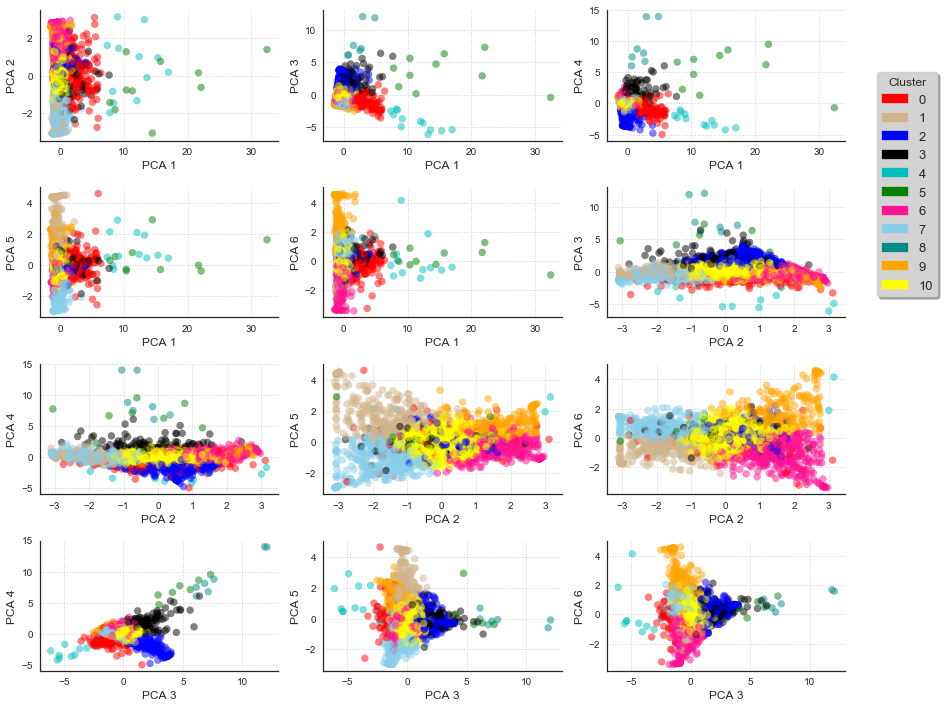

In [94]:
fig = plt.figure(figsize =(12,10))
increment =0
for ix in range(6):
    for iy in range(ix+1, 6):
        increment += 1
        ax = fig.add_subplot(4,3,increment)
        #ax.scatter(mat[ix],mat[iy],c=label_color,alpha =0.5)
        ax.scatter(mat[ix], mat[iy], c= label_color, alpha=0.5)
        plt.ylabel('PCA {}'.format(iy +1),fontsize =12)
        plt.xlabel('PCA {}'.format(ix +1),fontsize =12)
        ax.yaxis.grid(color = 'lightgray',linestyle =':')
        ax.xaxis.grid(color = 'lightgray',linestyle =':')
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        
        
        if increment == 12:
            break
    if increment ==12:
        break       

comp_handler = []
for i in range(n_clusters):
    comp_handler.append(mpatches.Patch(color = LABEL_COLOR_MAP[i], label = i))

plt.legend(handles=comp_handler, bbox_to_anchor=(1.1, 0.9), 
           title='Cluster', facecolor = 'lightgrey',
           shadow = True, frameon = True, framealpha = 1,
           fontsize = 13, bbox_transform = plt.gcf().transFigure)

plt.tight_layout()

In [95]:
sample_silhouette_values = silhouette_samples(scaler_matrix,clusters_clients)

In [96]:
sample_silhouette_values = silhouette_samples(scaler_matrix,clusters_clients)

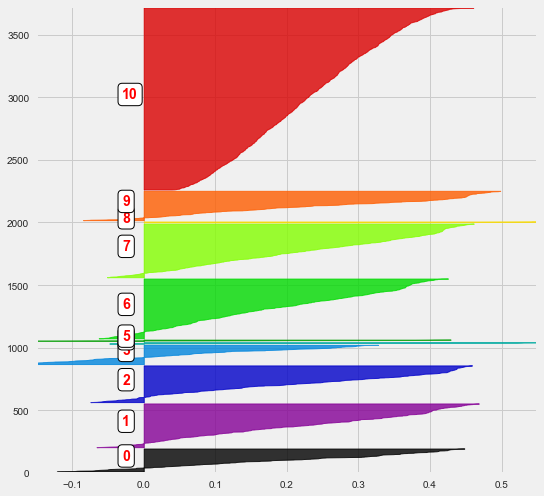

In [97]:
graph_component_silhouette(n_clusters,[-0.15,0.55],len(scaler_matrix),sample_silhouette_values,clusters_clients)

In [98]:
selected_customers.loc[:,'clusters'] = clusters_clients

In [99]:
selected_customers[:5]

,CustomerID,count,min,max,mean,sum,categ_0,categ_1,categ_2,categ_3,categ_4,LastPurchase,FirstPurchase,clusters
0,12347.0,5,382.52,711.79,558.172000,2790.86,36.519926,8.676179,29.836681,10.442659,14.524555,59,297,10
1,12348.0,4,227.44,892.80,449.310000,1797.24,20.030714,0.000000,41.953217,38.016069,0.000000,5,288,6
2,12350.0,1,334.40,334.40,334.400000,334.40,11.961722,0.000000,48.444976,11.692584,27.900718,240,240,6
3,12352.0,6,144.35,840.30,345.663333,2073.98,68.944734,14.301006,12.892120,0.491808,3.370331,2,226,7
4,12353.0,1,89.00,89.00,89.000000,89.00,44.719101,22.359551,13.033708,0.000000,19.887640,134,134,7


In [100]:
merged_df =  pd.DataFrame()
for i in range(n_clusters):
    test = pd.DataFrame(selected_customers[selected_customers['clusters'] == i].mean())
    test = test.T.set_index('clusters',drop = True)
    test['size'] = selected_customers[selected_customers['clusters'] == i].shape[0]
    merged_df = pd.concat([merged_df,test])
#-------------------------------------------------------------------------
merged_df.drop('CustomerID',axis = 1,inplace = True)
print('number of customers:',merged_df['size'].sum())

merged_df = merged_df.sort_values('sum')

number of customers: 3608


最后，我通过订购不同的集群来重新组织dataframe的内容：首先，与每个产品类别中的wp发送数量有关，然后根据所花费的总金额：

In [101]:
list_index= []
for i in range(5):
    column = 'categ_{}'.format(i)
    list_index.append(merged_df[merged_df[column] >45].index.values[0])

In [102]:
#------------------------------------------------------------------------
list_index_reordered = list_index
list_index_reordered += [s for s in merged_df.index if s not in list_index]

In [103]:
#-----------------------------------------------------------------------------
merged_df = merged_df.reindex(index=list_index_reordered)
merged_df = merged_df.reset_index(drop=False)
display(merged_df[['clusters','count','min','mean','sum','categ_0','categ_1','categ_2','categ_3','categ_4','size']])

,clusters,count,min,mean,sum,categ_0,categ_1,categ_2,categ_3,categ_4,size
0,7.0,2.228438,211.103054,274.572519,701.567203,59.761516,12.879751,10.694444,5.165645,11.521460,429
1,1.0,2.502857,192.872803,246.358670,637.946117,19.315748,52.150979,11.688894,5.298483,11.562019,350
2,6.0,2.445607,216.848766,272.414242,677.601174,11.319719,6.086327,56.614960,13.142187,12.839921,478
3,9.0,2.234043,192.611319,248.095380,597.051489,8.084564,5.442219,18.125376,57.203891,11.143950,235
4,2.0,2.591837,212.200306,293.605734,824.346429,9.628434,7.365337,15.142753,7.006628,60.856848,294
5,10.0,3.277854,216.718439,327.427796,1083.006479,23.811596,14.386749,25.699272,13.792644,22.317736,1454
6,0.0,1.697297,1047.116541,1196.774113,2084.702059,26.321130,13.840762,26.418577,12.131124,21.288772,185
7,4.0,1.666667,3480.920833,3700.139306,5949.600000,25.406109,18.278470,20.102624,22.890736,13.322062,12
8,3.0,18.233766,88.550195,574.904444,9926.581234,22.950422,15.539758,23.878568,12.209346,25.442253,154
9,8.0,92.000000,10.985714,374.601553,34845.105714,20.826842,17.721038,25.832531,13.117583,22.527857,7


In [104]:
merged_df[['clusters','size']].T

,0,1,2,3,4,5,6,7,8,9,10
clusters,7.0,1.0,6.0,9.0,2.0,10.0,0.0,4.0,3.0,8.0,5.0
size,429.0,350.0,478.0,235.0,294.0,1454.0,185.0,12.0,154.0,7.0,10.0


In [105]:
pd.DataFrame(pd.Series(clusters_clients).value_counts(),columns =['nb. de client']).T

,10,6,7,1,2,9,0,3,4,5,8
nb. de client,1454,478,429,350,294,235,185,154,12,10,7


In [106]:
def _scale_data(data, ranges):
    (x1, x2) = ranges[0]
    d = data[0]
    return [(d - y1) / (y2 - y1) * (x2 - x1) + x1 for d, (y1, y2) in zip(data, ranges)]

class RadarChart():
    def __init__(self, fig, location, sizes, variables, ranges, n_ordinate_levels = 6):

        angles = np.arange(0, 360, 360./len(variables))

        ix, iy = location[:] 
        size_x, size_y = sizes[:]
        
        axes = [fig.add_axes([ix, iy, size_x, size_y], polar = True, 
        label = "axes{}".format(i)) for i in range(len(variables))]

        _, text = axes[0].set_thetagrids(angles, labels = variables)
        
        for txt, angle in zip(text, angles):
            if angle > -1 and angle < 181:
                txt.set_rotation(angle - 90)
            else:
                txt.set_rotation(angle - 270)
        
        for ax in axes[1:]:
            ax.patch.set_visible(False)
            ax.xaxis.set_visible(False)
            ax.grid("off")
        
        for i, ax in enumerate(axes):
            grid = np.linspace(*ranges[i],num = n_ordinate_levels)
            grid_label = [""]+["{:.0f}".format(x) for x in grid[1:-1]]
            ax.set_rgrids(grid, labels = grid_label, angle = angles[i])
            ax.set_ylim(*ranges[i])
        
        self.angle = np.deg2rad(np.r_[angles, angles[0]])
        self.ranges = ranges
        self.ax = axes[0]
                
    def plot(self, data, *args, **kw):
        sdata = _scale_data(data, self.ranges)
        self.ax.plot(self.angle, np.r_[sdata, sdata[0]], *args, **kw)

    def fill(self, data, *args, **kw):
        sdata = _scale_data(data, self.ranges)
        self.ax.fill(self.angle, np.r_[sdata, sdata[0]], *args, **kw)

    def legend(self, *args, **kw):
        self.ax.legend(*args, **kw)
        
    def title(self, title, *args, **kw):
        self.ax.text(0.9, 1, title, transform = self.ax.transAxes, *args, **kw)

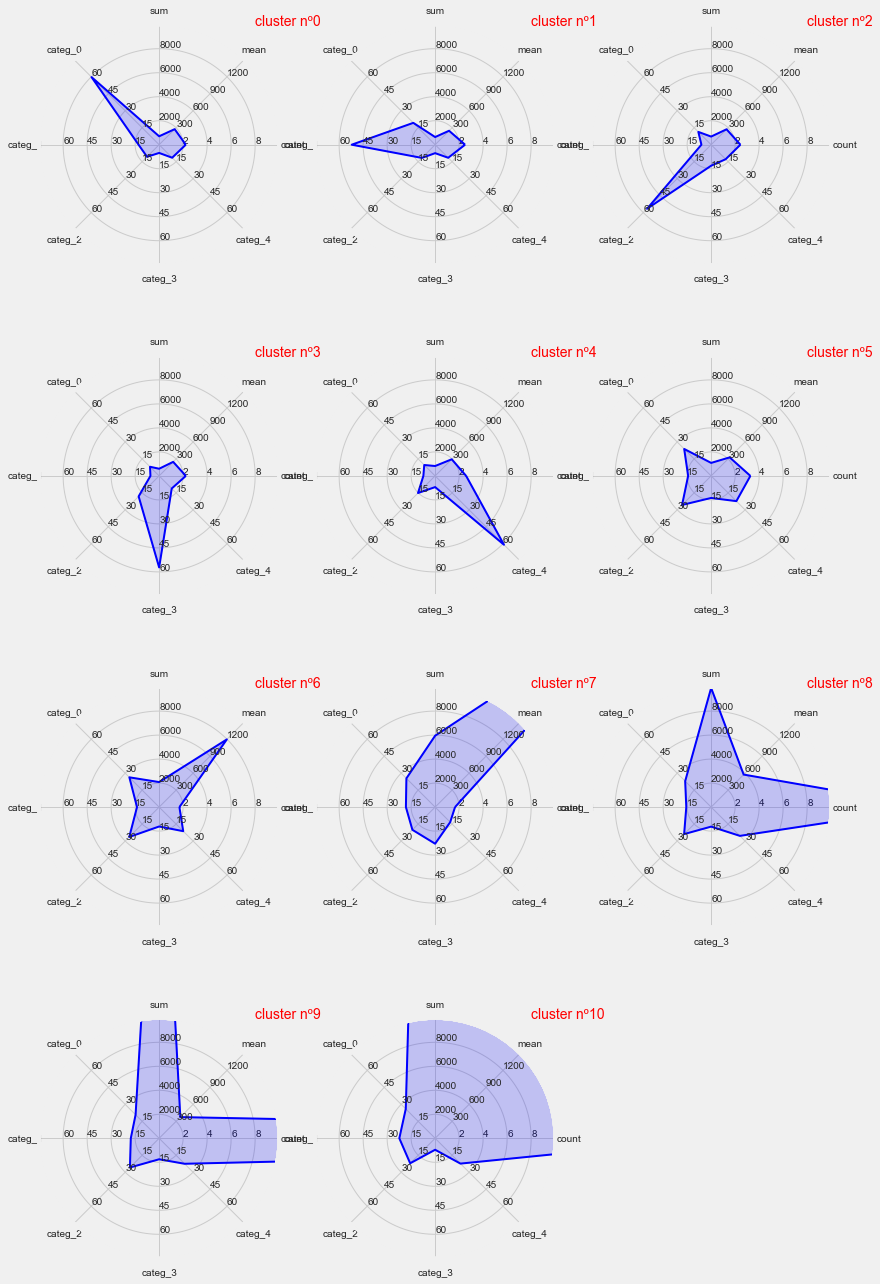

In [107]:
fig = plt.figure(figsize=(10,12))

attributes = ['count', 'mean', 'sum', 'categ_0', 'categ_1', 'categ_2', 'categ_3', 'categ_4']
ranges = [[0.01, 10], [0.01, 1500], [0.01, 10000], [0.01, 75], [0.01, 75], [0.01, 75], [0.01, 75], [0.01, 75]]
index  = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

n_groups = n_clusters ; i_cols = 3
i_rows = n_groups//i_cols
size_x, size_y = (1/i_cols), (1/i_rows)

for ind in range(n_clusters):
    ix = ind%3 ; iy = i_rows - ind//3
    pos_x = ix*(size_x + 0.05) 
    pos_y = iy*(size_y + 0.05)            
    location = [pos_x, pos_y]  
    sizes = [size_x, size_y] 
    #______________________________________________________
    data = np.array(merged_df.loc[index[ind], attributes])    
    radar = RadarChart(fig, location, sizes, attributes, ranges)
    radar.plot(data, color = 'b', linewidth=2)
    radar.fill(data, alpha = 0.2, color = 'b')
    radar.title(title = 'cluster nº{}'.format(index[ind]), color = 'r')
    ind += 1 

## 5构建模型

In [113]:
class Class_Fit(object):
    def __init__(self, clf, params=None):
        if params:            
            self.clf = clf(**params)
        else:
            self.clf = clf()

    def train(self, x_train, y_train):
        self.clf.fit(x_train, y_train)

    def predict(self, x):
        return self.clf.predict(x)
    
    def grid_search(self, parameters, Kfold):
        self.grid = GridSearchCV(estimator = self.clf, param_grid = parameters, cv = Kfold)
        
    def grid_fit(self, X, Y):
        self.grid.fit(X, Y)
        
    def grid_predict(self, X, Y):
        self.predictions = self.grid.predict(X)
        print("Precision: {:.2f} % ".format(100*metrics.accuracy_score(Y, self.predictions)))

In [115]:
columns = ['mean', 'categ_0', 'categ_1', 'categ_2', 'categ_3', 'categ_4' ]
X = selected_customers[columns]
Y = selected_customers['clusters']

In [116]:
#划分测试集和训练集
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, train_size = 0.8)

### 5.1支持向量机分类器（SVM）

In [120]:
#传参数
svc = Class_Fit(clf = svm.LinearSVC)
svc.grid_search(parameters = [{'C':np.logspace(-2,2,10)}], Kfold = 5)

In [123]:
#训练模型
svc.grid_fit(X = X_train, Y = Y_train)
#测试模型
svc.grid_predict(X_test, Y_test)

Precision: 85.60 % 


### 5.5.1 混淆矩阵

In [124]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    #_________________________________________________
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)
    #_________________________________________________
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    #_________________________________________________
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization


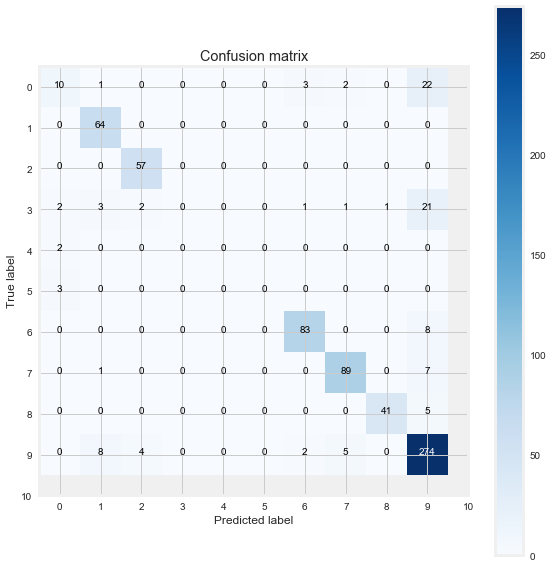

In [126]:
class_names = [i for i in range(11)]
cnf_matrix = confusion_matrix(Y_test, svc.predictions) 
np.set_printoptions(precision=2)
plt.figure(figsize = (8,8))
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize = False, title='Confusion matrix')

### 5.1.2学习曲线

In [127]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 10)):
    """Generate a simple plot of the test and training learning curve"""
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    plt.legend(loc="best")
    return plt

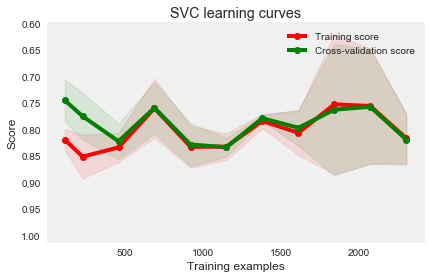

In [129]:
g = plot_learning_curve(svc.grid.best_estimator_, "SVC learning curves", X_train, Y_train, ylim = [1.01, 0.6],
                        cv = 5,  train_sizes = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

## 5.2逻辑回归

In [130]:
lr = Class_Fit(clf = linear_model.LogisticRegression)
lr.grid_search(parameters = [{'C':np.logspace(-2,2,20)}],Kfold = 5)
lr.grid_fit(X = X_train, Y = Y_train)
lr.grid_predict(X_test, Y_test)

Precision: 86.01 % 


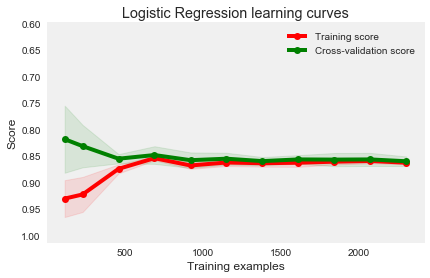

In [131]:
g = plot_learning_curve(lr.grid.best_estimator_,'Logistic Regression learning curves',X_train,Y_train,ylim=[1.01,0.6],
                       cv = 5, train_sizes = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5,0.6, 0.7, 0.8, 0.9, 1])

## 5.3 k-Nearest Neighbors

In [132]:
knn = Class_Fit(clf = neighbors.KNeighborsClassifier)
knn.grid_search(parameters = [{'n_neighbors':np.arange(1,50,1)}],Kfold = 5)
knn.grid_fit(X = X_train, Y = Y_train)
knn.grid_predict(X_test, Y_test)

Precision: 80.47 % 


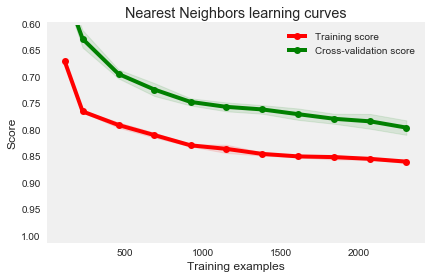

In [133]:
g = plot_learning_curve(knn.grid.best_estimator_,'Nearest Neighbors learning curves',X_train,Y_train,ylim=[1.01,0.6],
                       cv = 5, train_sizes = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5,0.6, 0.7, 0.8, 0.9, 1])

## 5.4 决策树

In [134]:
tr = Class_Fit(clf = tree.DecisionTreeClassifier)
tr.grid_search(parameters = [{'criterion':['entropy','gini'],'max_features':['sqrt','log2']}],Kfold = 5)
tr.grid_fit(X = X_train, Y = Y_train)
tr.grid_predict(X_test, Y_test)

Precision: 83.24 % 


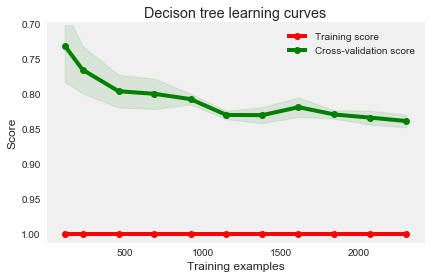

In [135]:
g = plot_learning_curve(tr.grid.best_estimator_,'Decison tree learning curves',X_train,Y_train,ylim=[1.01,0.7],
                       cv = 5, train_sizes = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5,0.6, 0.7, 0.8, 0.9, 1])

## 5.5 随机森林

In [136]:
rf = Class_Fit(clf = ensemble.RandomForestClassifier)
param_grid = {'criterion' : ['entropy', 'gini'], 'n_estimators' : [20, 40, 60, 80, 100],
               'max_features' :['sqrt', 'log2']}
rf.grid_search(parameters = param_grid, Kfold = 5)
rf.grid_fit(X = X_train, Y = Y_train)
rf.grid_predict(X_test, Y_test)

Precision: 90.72 % 


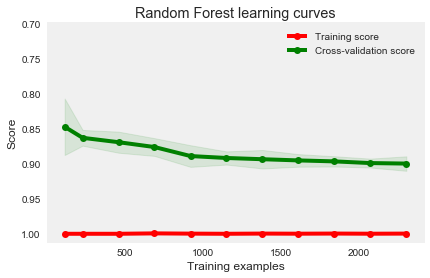

In [137]:
g = plot_learning_curve(rf.grid.best_estimator_, "Random Forest learning curves", X_train, Y_train,
                        ylim = [1.01, 0.7], cv = 5, 
                        train_sizes = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

## 5.6 adaboost

In [138]:
ada = Class_Fit(clf = AdaBoostClassifier)
param_grid = {'n_estimators' : [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]}
ada.grid_search(parameters = param_grid, Kfold = 5)
ada.grid_fit(X = X_train, Y = Y_train)
ada.grid_predict(X_test, Y_test)

Precision: 51.25 % 


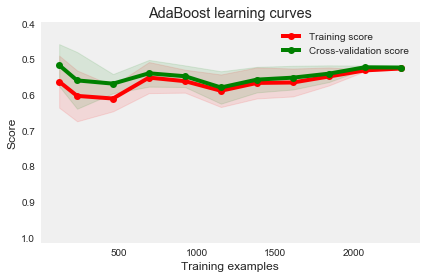

In [139]:
g = plot_learning_curve(ada.grid.best_estimator_, "AdaBoost learning curves", X_train, Y_train,
                        ylim = [1.01, 0.4], cv = 5, 
                        train_sizes = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

## 5.8 投票集成学习

In [143]:
import sklearn as skl
from sklearn import svm
from sklearn.svm import LinearSVC
from sklearn.svm import *
from sklearn.model_selection import GridSearchCV
rf_best  = ensemble.RandomForestClassifier(**rf.grid.best_params_)
gb_best  = ensemble.GradientBoostingClassifier(**gb.grid.best_params_)
svc_best = svm.LinearSVC(**svc.grid.best_params_)
tr_best  = tree.DecisionTreeClassifier(**tr.grid.best_params_)
knn_best = neighbors.KNeighborsClassifier(**knn.grid.best_params_)
lr_best  = linear_model.LogisticRegression(**lr.grid.best_params_)

In [144]:
votingC = ensemble.VotingClassifier(estimators=[('rf', rf_best),('gb', gb_best),
                                                ('knn', knn_best)], voting='soft')

In [145]:
votingC = votingC.fit(X_train, Y_train)

最后，我们可以为这个模型创建一个预测：

In [146]:
predictions = votingC.predict(X_test)
print("Precision: {:.2f} % ".format(100*metrics.accuracy_score(Y_test, predictions)))

Precision: 91.27 % 


## 6.测试预测结果

In [147]:
basket_price = set_test.copy(deep = True)

In [148]:
transactions_per_user=basket_price.groupby(by=['CustomerID'])['Basket Price'].agg(['count','min','max','mean','sum'])
for i in range(5):
    col = 'categ_{}'.format(i)
    transactions_per_user.loc[:,col] = basket_price.groupby(by=['CustomerID'])[col].sum() /\
                                            transactions_per_user['sum']*100

transactions_per_user.reset_index(drop = False, inplace = True)
basket_price.groupby(by=['CustomerID'])['categ_0'].sum()

#_______________________
# Correcting time range
transactions_per_user['count'] = 5 * transactions_per_user['count']
transactions_per_user['sum']   = transactions_per_user['count'] * transactions_per_user['mean']

transactions_per_user.sort_values('CustomerID', ascending = True)[:5]

,CustomerID,count,min,max,mean,sum,categ_0,categ_1,categ_2,categ_3,categ_4
0,12347.0,10,224.82,1294.32,759.57,7595.70,29.307371,5.634767,20.017905,12.696657,32.343299
1,12349.0,5,1757.55,1757.55,1757.55,8787.75,36.346050,20.389178,26.506216,4.513101,12.245455
2,12352.0,5,311.73,311.73,311.73,1558.65,32.881019,17.290604,34.420813,6.672441,8.735123
3,12356.0,5,58.35,58.35,58.35,291.75,100.000000,0.000000,0.000000,0.000000,0.000000
4,12357.0,5,6207.67,6207.67,6207.67,31038.35,36.560900,25.189000,18.475531,5.089832,14.684737


In [149]:
list_cols = ['count','min','max','mean','categ_0','categ_1','categ_2','categ_3','categ_4']
#_____________________________________________________________
matrix_test = transactions_per_user[list_cols].as_matrix()
scaled_test_matrix = scaler.transform(matrix_test)

In [150]:
Y = kmeans.predict(scaled_test_matrix)

In [151]:
columns = ['mean', 'categ_0', 'categ_1', 'categ_2', 'categ_3', 'categ_4' ]
X = transactions_per_user[columns]

In [152]:
classifiers = [(lr, 'Logostic Regression'),
                (knn, 'k-Nearest Neighbors'),
                (tr, 'Decision Tree'),
                (rf, 'Random Forest'),
                (gb, 'Gradient Boosting')]
#______________________________
for clf, label in classifiers:
    print(30*'_', '\n{}'.format(label))
    clf.grid_predict(X, Y)

______________________________ 
Logostic Regression
Precision: 71.66 % 
______________________________ 
k-Nearest Neighbors
Precision: 67.93 % 
______________________________ 
Decision Tree
Precision: 71.15 % 
______________________________ 
Random Forest
Precision: 75.11 % 
______________________________ 
Gradient Boosting
Precision: 75.23 % 


In [153]:
predictions = votingC.predict(X)
print("Precision: {:.2f} % ".format(100*metrics.accuracy_score(Y, predictions)))

Precision: 75.34 % 


######  对测试集进行预测，集成学习算法预测得分达到 75.34%，依然保持相对较高的准确率。